In [3]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr, ttest_ind, chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)
data_us = pd.read_csv("C:/Users/adity/Downloads/US.csv")
data_us['date'] = pd.to_datetime(data_us['date'])

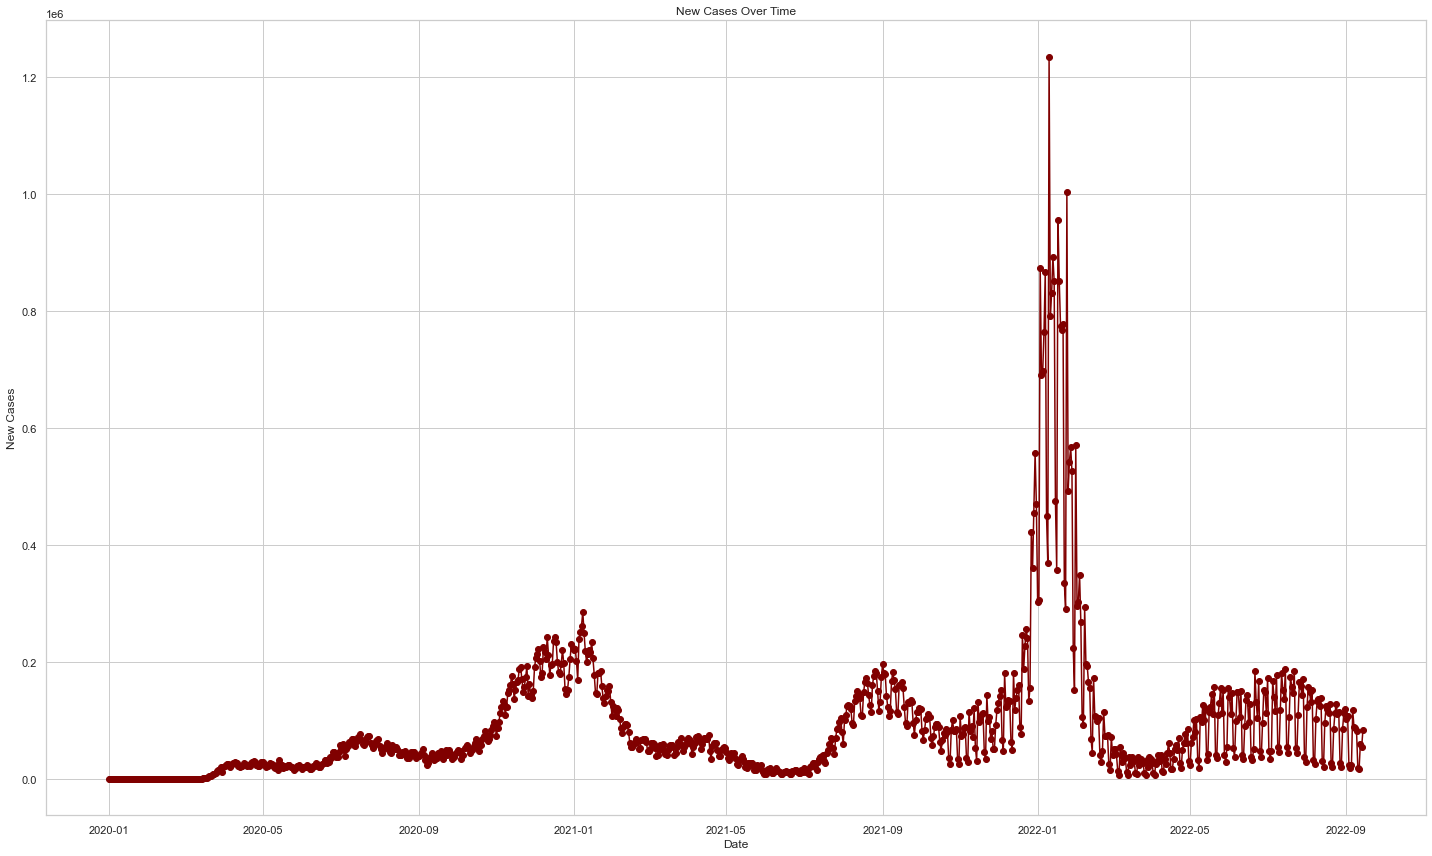

In [4]:
plt.figure(figsize=(20, 12))
plt.plot(data_us['date'], data_us['new_confirmed'], marker='o', color='maroon') 
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.title('New Cases Over Time')
plt.tight_layout()
plt.show()

In [6]:
usa_cases = data_us['new_confirmed'].dropna()
print(usa_cases.describe())
usa_vaccinated = data_us['new_persons_vaccinated'].dropna()
print(usa_vaccinated.describe())
usa_hospitalisations = data_us['new_hospitalized_patients'].dropna()
print(usa_hospitalisations.describe())

count    9.880000e+02
mean     9.290546e+04
std      1.264354e+05
min      0.000000e+00
25%      2.699375e+04
50%      5.583850e+04
75%      1.194122e+05
max      1.235521e+06
Name: new_confirmed, dtype: float64
count    6.410000e+02
mean     4.116745e+05
std      5.078799e+05
min      0.000000e+00
25%      6.105600e+04
50%      2.528370e+05
75%      4.922420e+05
max      2.556148e+06
Name: new_persons_vaccinated, dtype: float64
count      977.000000
mean      5816.723644
std       4753.367997
min      -2858.000000
25%       2216.000000
50%       4859.000000
75%       7372.000000
max      23477.000000
Name: new_hospitalized_patients, dtype: float64


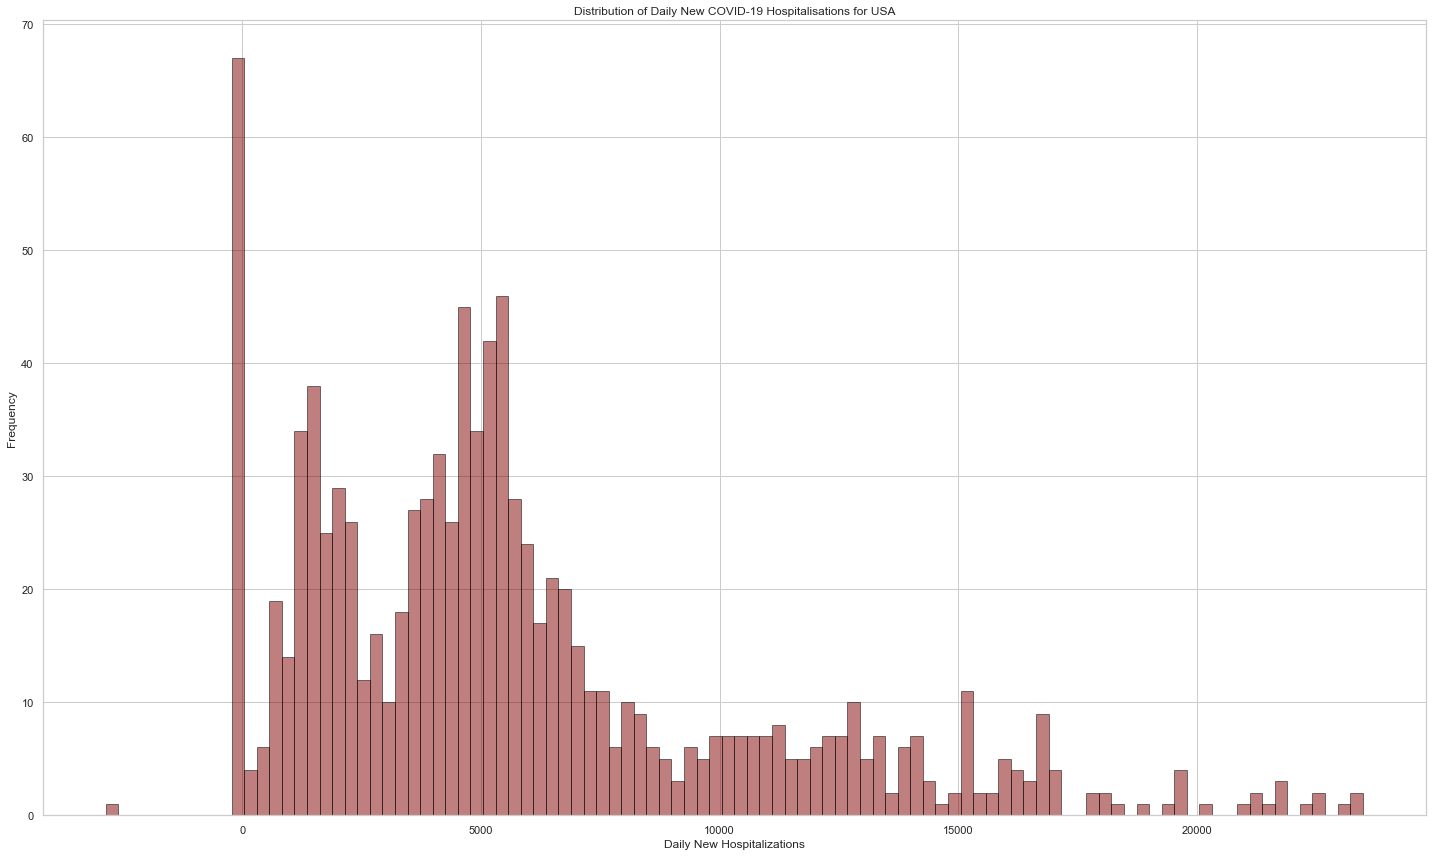

In [32]:
data_us = pd.read_csv("C:/Users/adity/Downloads/US.csv")
usa_cases = data_us['new_hospitalized_patients'].dropna()
plt.figure(figsize=(20, 12))
plt.hist(usa_cases, bins=100, alpha=0.5, color='maroon', edgecolor='black')
plt.xlabel('Daily New Hospitalizations')
plt.ylabel('Frequency')
plt.title('Distribution of Daily New COVID-19 Hospitalisations for USA')
plt.tight_layout()
plt.show()


In [80]:
data_us = pd.read_csv("C:/Users/adity/Downloads/US.csv").dropna(subset=['new_hospitalized_patients', 'new_confirmed'])
pearson_corr, pearson_p = pearsonr(data_us['new_confirmed'], data_us['new_hospitalized_patients'])
print(f"Pearson Correlation: {pearson_corr}")
spearman_corr, spearman_p = spearmanr(data_us['new_confirmed'], data_us['new_hospitalized_patients'])
print(f"Spearman Correlation: {spearman_corr}")

Pearson Correlation: 0.7936086808119485
Spearman Correlation: 0.8808652883667767


In [92]:
data_us = pd.read_csv("C:/Users/adity/Downloads/US.csv").dropna(subset=['new_hospitalized_patients', 'new_persons_fully_vaccinated'])
pearson_corr, pearson_p = pearsonr(data_us['new_persons_fully_vaccinated'], data_us['new_hospitalized_patients'])
print(f"Pearson Correlation: {pearson_corr}")

Pearson Correlation: -0.12328593389340528


In [106]:
for i in range(30):
    data_us = pd.read_csv("C:/Users/adity/Downloads/US.csv").dropna(subset=['new_hospitalized_patients', 'new_persons_fully_vaccinated'])
    data_us['new_persons_fully_vaccinated_lagged'] = data_us['new_persons_fully_vaccinated'].shift(i)
    data_us = data_us.dropna(subset=['new_persons_fully_vaccinated_lagged'])
    pearson_corr, pearson_p = pearsonr(data_us['new_persons_fully_vaccinated_lagged'], data_us['new_hospitalized_patients'])
    print(i,pearson_corr,pearson_p )


0 -0.12328593389340528 0.0017795869060191149
1 -0.12953695141341487 0.0010310311080503538
2 -0.1410676824414795 0.00035145980873253774
3 -0.15110698441224352 0.00012904160602847937
4 -0.15320883448835548 0.0001048422063615689
5 -0.15435156562381253 9.4108324493457e-05
6 -0.15291415633909286 0.00011089041426472118
7 -0.15584634956671056 8.23873117257085e-05
8 -0.16151674901048163 4.518256342571151e-05
9 -0.17066619753340168 1.6307250189095235e-05
10 -0.17786211493115472 7.07909380752681e-06
11 -0.17866847602832034 6.531992762740393e-06
12 -0.1799240278843142 5.70664453840084e-06
13 -0.1796303814838273 6.015978983518952e-06
14 -0.18040678946926378 5.570338877044853e-06
15 -0.18451156729426027 3.425867395153293e-06
16 -0.19155609924952904 1.4342740250225117e-06
17 -0.19713801834886277 7.070169616997404e-07
18 -0.19549164170573533 8.959128337972068e-07
19 -0.19421560340488994 1.0793799816773237e-06
20 -0.1909402608241677 1.676914042234419e-06
21 -0.19034059681735083 1.8448244980290147e-06


In [103]:
# Load your dataset
data_us = pd.read_csv("C:/Users/adity/Downloads/US.csv")
# Define your independent variables and dependent variable
data_us['new_persons_fully_vaccinated_lagged'] = data_us['new_persons_fully_vaccinated'].shift(24)
data_us=data_us.dropna(subset=['new_hospitalized_patients', 'new_confirmed','new_persons_fully_vaccinated_lagged'])
X = data_us[['new_confirmed', 'new_persons_fully_vaccinated_lagged']]
y = data_us['new_hospitalized_patients']

# Add a constant to the model (for the intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())


                                OLS Regression Results                               
Dep. Variable:     new_hospitalized_patients   R-squared:                       0.657
Model:                                   OLS   Adj. R-squared:                  0.656
Method:                        Least Squares   F-statistic:                     587.4
Date:                       Wed, 06 Nov 2024   Prob (F-statistic):          3.32e-143
Time:                               21:01:40   Log-Likelihood:                -5724.0
No. Observations:                        616   AIC:                         1.145e+04
Df Residuals:                            613   BIC:                         1.147e+04
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------